In [ ]:
# On essaie une méthode pour tracer les trajectoires en récupérant tous les ego_poses

# Trajectoire Extension CAN

In [ ]:
# On comparera ce tracer à celui fait avec l'extension CAN :

In [1]:
from nuscenes.can_bus.can_bus_api import NuScenesCanBus
nusc_can = NuScenesCanBus(dataroot='/Users/tiffanydarini/nuscenes-devkit/python-sdk/tutorials/data/sets/nuscenes')


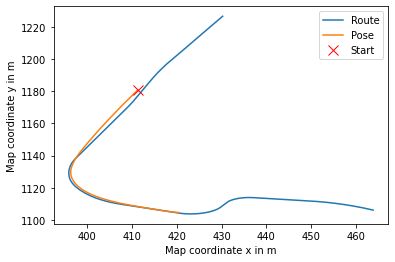

In [2]:
scene_name = 'scene-0061'
nusc_can.plot_baseline_route(scene_name)

# Trajectoire (x,y) 

In [3]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-mini', dataroot='/Users/tiffanydarini/nuscenes-devkit/python-sdk/tutorials/data/sets/nuscenes/v1.0-mini', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.353 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [4]:
# On récupère le token de la scène à partir du nom (ça fonctionne après vérification)
scene_token = nusc.field2token('scene','name',scene_name)[0]
scene_token

'cc8c0bf57f984915a77078b10eb33198'

In [7]:
# Fonction qui renvoie les tables ego_pose d'une scène donnée
def get_poses(scene_token):
    pose_list = []
    scene_rec = nusc.get('scene', scene_token)
    sample_rec = nusc.get('sample', scene_rec['first_sample_token'])
    sd_rec = nusc.get('sample_data', sample_rec['data']['LIDAR_TOP'])
    
    ego_pose = nusc.get('ego_pose', sd_rec['token'])
    pose_list.append(ego_pose)

    while sd_rec['next'] != '':
        sd_rec = nusc.get('sample_data', sd_rec['next'])
        ego_pose = nusc.get('ego_pose', sd_rec['token'])
        pose_list.append(ego_pose)

    return pose_list

In [8]:
Liste_ego_poses = get_poses(scene_token) 
Liste_ego_poses

[{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
  'timestamp': 1532402927647951,
  'rotation': [0.5720320396729045,
   -0.0016977771610471074,
   0.011798001930183783,
   -0.8201446642457809],
  'translation': [411.3039349319818, 1180.8903791765097, 0.0]},
 {'token': '0cedf1d2d652468d92d23491136b5d15',
  'timestamp': 1532402927697752,
  'rotation': [0.5723064515888109,
   -0.0011293246741329009,
   0.012384035581812416,
   -0.8199455382879475],
  'translation': [411.1460058846436, 1180.4637184008757, 0.0]},
 {'token': '0865d9cca7f647c3a2d37f9ba7a2d7f4',
  'timestamp': 1532402927747489,
  'rotation': [0.5730265810139262,
   -0.0009183739546356536,
   0.013166172311956086,
   -0.819430500986766],
  'translation': [410.99079045607704, 1180.0378664135337, 0.0]},
 {'token': '5eb7f6b2a4f24920adeea7460397b077',
  'timestamp': 1532402927797806,
  'rotation': [0.5732698935065234,
   -0.001335559559758309,
   0.013758773557346527,
   -0.8192499872626666],
  'translation': [410.83151737602134, 117

In [9]:
# Création des liste de coordonnées du véhicule égo 
X_coord =[]
Y_coord =[]
Z_coord =[]
for k in range(0,len(Liste_ego_poses)):
    X_coord.append(Liste_ego_poses[k]['translation'][0])
    Y_coord.append(Liste_ego_poses[k]['translation'][1])
    Z_coord.append(Liste_ego_poses[k]['translation'][2])


In [10]:
# Lieu de départ 
X1 = X_coord[0]
Y1 = Y_coord[0]

Text(0.5, 1.0, 'Trajectoire du véhicule ego dans la scene-0061')

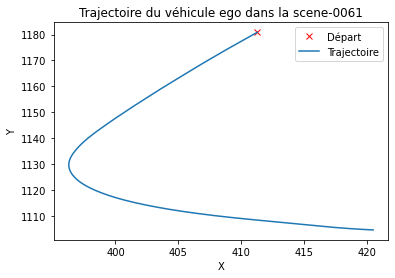

In [11]:
import matplotlib.pyplot as plt
plt.plot(X1,Y1,'x',label='Départ',color='r')
plt.plot(X_coord,Y_coord,label ='Trajectoire')
plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectoire du véhicule ego dans la '+scene_name)
#On obtient bien la même trajectoire qu'avec l'extension CAN

In [12]:
# Automatisation : création d'une fonction qui pour le nom d'une scène, renvoie la trajectoire du véhicule ego dans la scène 

import matplotlib.pyplot as plt

def trajectoire_ego(scene_name):
    scene_token = nusc.field2token('scene','name',scene_name)[0] # on récupère le token de la scène
    
    Liste_ego_poses = get_poses(scene_token) # on récupère la liste des ego_poses correspondant 
    
    # On crée la liste des coordonnées
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
    
    # Lieu de départ 
    X1 = X_coord[0]
    Y1 = Y_coord[0]
    
    # Tracer 
    plt.plot(X1,Y1,'x',label='Départ',color='r')
    plt.plot(X_coord,Y_coord,label ='Trajectoire')
    plt.legend(loc='best')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Trajectoire du véhicule ego dans la '+scene_name)


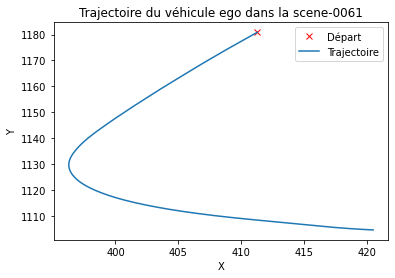

In [13]:
trajectoire_ego(scene_name)

# Trajectoire (t,d)

Pour déterminer les caractéristiques dynamiques des véhicules, on va tracer leur trajectoire dans le plan (d,t), c'est-à-dire qu'on va tracer leur trajectoire en calculant pour chaque point que l'on a, la distance entre ces deux points et le temps entre ces deux points. 

In [14]:
# On utilise ce qu'on a déjà (liste ego_poses)
scene_name = 'scene-0061'
scene_token = nusc.field2token('scene','name',scene_name)[0]
Liste_ego_poses = get_poses(scene_token) 

# Création des liste de coordonnées du véhicule égo 
X_coord =[]
Y_coord =[]
Z_coord =[]
T_timestamp = [] # liste des timestamps
for k in range(0,len(Liste_ego_poses)):
    X_coord.append(Liste_ego_poses[k]['translation'][0])
    Y_coord.append(Liste_ego_poses[k]['translation'][1])
    Z_coord.append(Liste_ego_poses[k]['translation'][2])
    T_timestamp.append(Liste_ego_poses[k]['timestamp'])


In [15]:
# Recupération des distances et temps correspondants :
from math import sqrt
import datetime 
from datetime import timedelta

D =[0]
T=[0]
for k in range(0,len(T_timestamp)-1):
    d = D[k]+ sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2)
    D.append(d)
    t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6)
    t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
    t = T[k]+(t2-t1).total_seconds() 
    T.append(t)


Text(0.5, 1.0, 'Distance en fonction du temps véhicule ego dans la scene-0061')

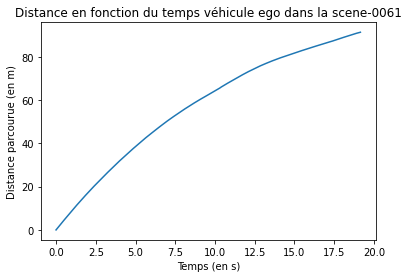

In [16]:
plt.plot(T,D)
plt.xlabel('Temps (en s)') # t=0 correspondant au début de la scène
plt.ylabel('Distance parcourue (en m)') # Les x,y,z sont en m 
plt.title('Distance en fonction du temps véhicule ego dans la '+scene_name)

In [17]:
# Distance parcourue sur le trajet
distance_totale = D[len(D)-1]
distance_totale

91.31494165290262

In [18]:
# Temps de parcours
import datetime 
from datetime import timedelta

date_debut = datetime.datetime.fromtimestamp(Liste_ego_poses[0]['timestamp'] / 1e6)
date_fin = datetime.datetime.fromtimestamp(Liste_ego_poses[len(Liste_ego_poses)-1]['timestamp'] / 1e6)

temps_total = (date_fin-date_debut).total_seconds() 
temps_total

19.149566

In [19]:
# Automatisation : pour une scène donnée, on trace la courbe (t,d)

#imports nécessaires
import matplotlib.pyplot as plt
from math import sqrt
import datetime 
from datetime import timedelta

def dyna_ego(scene_name):
    scene_token = nusc.field2token('scene','name',scene_name)[0] # on récupère le token de la scène
    
    Liste_ego_poses = get_poses(scene_token) # on récupère la liste des ego_poses correspondant 
    
    # Création des liste de coordonnées du véhicule égo 
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    T_timestamp = [] # liste des timestamps
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
        T_timestamp.append(Liste_ego_poses[k]['timestamp'])
    
    # On crée les listes de distances et de temps 
    D =[0]
    T=[0]
    for k in range(0,len(T_timestamp)-1):
        D.append(D[k]+sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2+(Z_coord[k+1]-Z_coord[k])**2))
        t2 = datetime.datetime.fromtimestamp(T_timestamp[k+1]/ 1e6) # on met les timestamp en datetime
        t1 = datetime.datetime.fromtimestamp(T_timestamp[k]/ 1e6)
        t = T[k]+(t2-t1).total_seconds() # On récupère le temps en seconde 
        T.append(t)
    
    # On trace 
    plt.plot(T,D)
    plt.xlabel('Temps (en s)') # t=0 correspondant au début de la scène
    plt.ylabel('Distance parcourue (en m)') # Les x,y,z sont en m 
    plt.title('Distance en fonction du temps véhicule ego dans la '+scene_name)
    

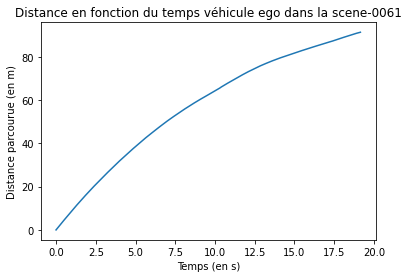

In [20]:
dyna_ego(scene_name)

# Test sur plusieurs scènes

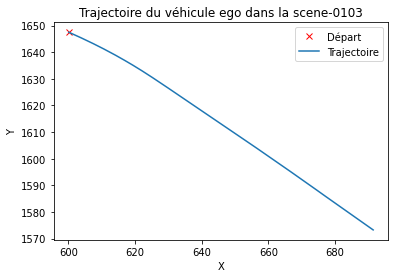

In [21]:
# scene-0103
scene_name = 'scene-0103'
trajectoire_ego(scene_name)

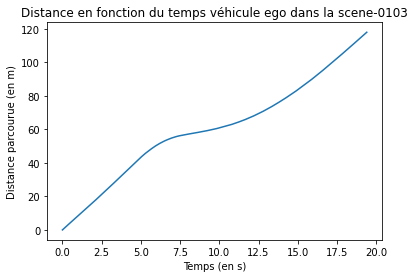

In [22]:
dyna_ego(scene_name)

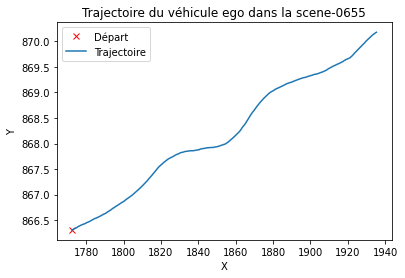

In [23]:
# scene-0655
scene_name = 'scene-0655'
trajectoire_ego(scene_name)

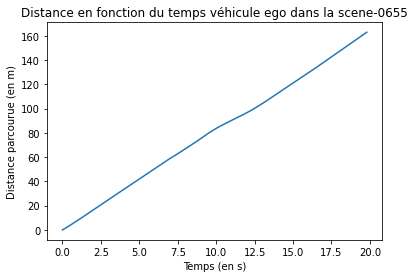

In [24]:
dyna_ego(scene_name)

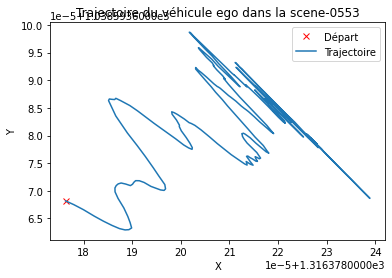

In [25]:
# scene-0553 (véhicule à l'arrêt sur la vidéo)
scene_name = 'scene-0553'
trajectoire_ego(scene_name)

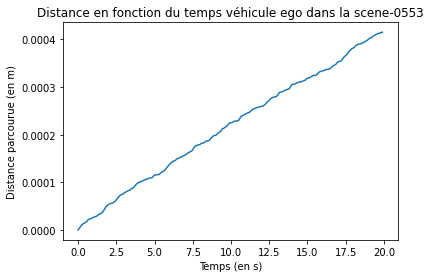

In [26]:
dyna_ego(scene_name)

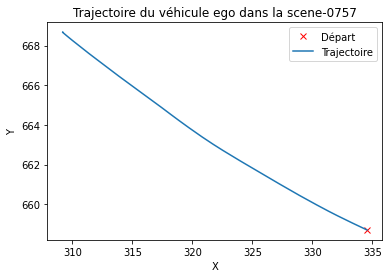

In [27]:
# scene-0757
scene_name = 'scene-0757'
trajectoire_ego(scene_name)

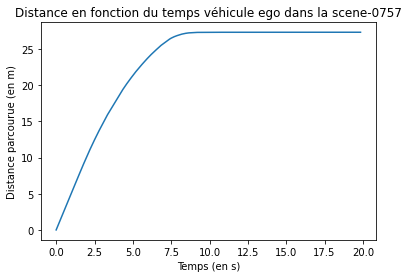

In [28]:
dyna_ego(scene_name)

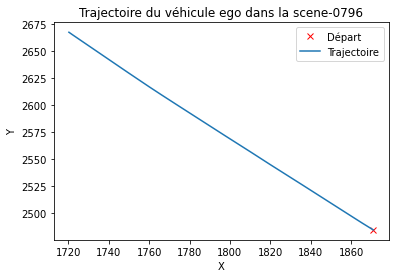

In [29]:
# scene-0796
scene_name = 'scene-0796'
trajectoire_ego(scene_name)

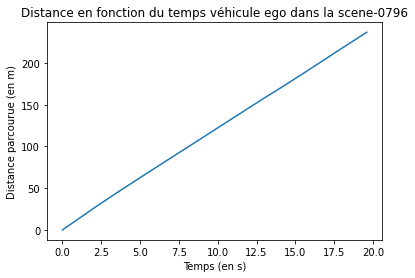

In [30]:
dyna_ego(scene_name)

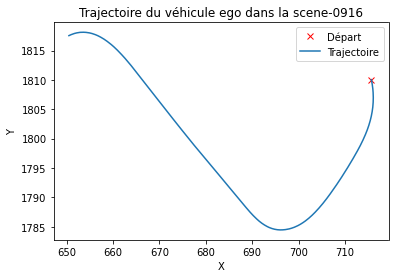

In [31]:
# scene-0916
scene_name = 'scene-0916'
trajectoire_ego(scene_name)

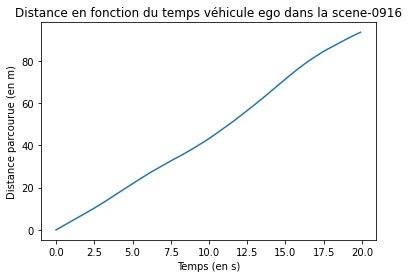

In [32]:
dyna_ego(scene_name)

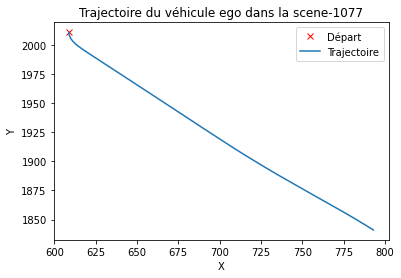

In [33]:
# scene-1077
scene_name = 'scene-1077'
trajectoire_ego(scene_name)

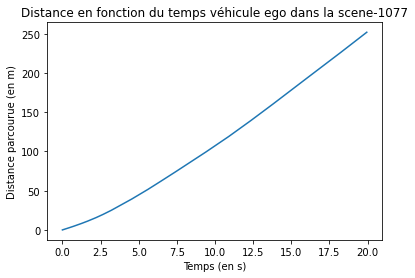

In [34]:
dyna_ego(scene_name)

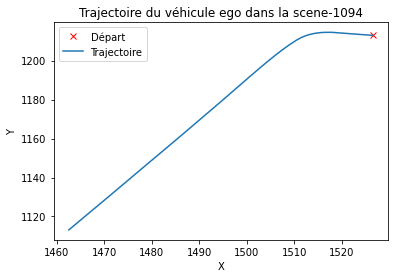

In [35]:
# scene-1094
scene_name = 'scene-1094'
trajectoire_ego(scene_name)

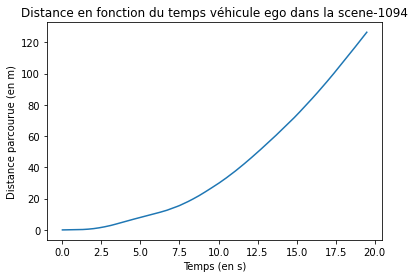

In [36]:
dyna_ego(scene_name)

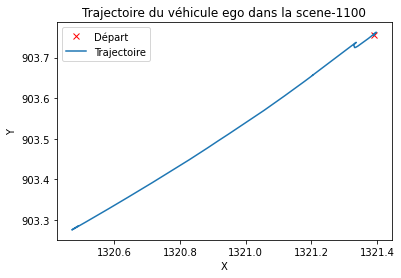

In [37]:
# scene-1100
scene_name = 'scene-1100'
trajectoire_ego(scene_name)

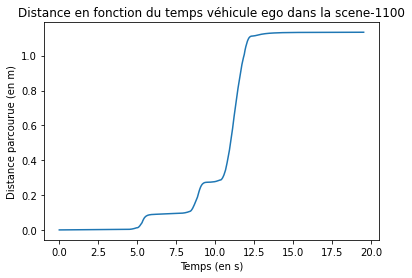

In [38]:
dyna_ego(scene_name)

# Trajectoires des éléments qui entourent le véhicule

### Étape 1 : On choisit une scène et on récupère les échantillons de la scène 

In [114]:
# On choisit une scène 
scene_name = 'scene-0061'
scene_token = nusc.field2token('scene','name',scene_name)[0]

# Ensemble des token des échantillons de la scene 
sample_token = nusc.field2token('sample','scene_token',scene_token)
len(sample_token)

39

### Étape 2 : On récupère les sample_annotation de la scène (boites d'objets dans la scène)

In [115]:
# Ensemble des sample_annotation de la scène :

# Méthode 1 
sample_annotation_token = []
for k in sample_token : 
    L = nusc.field2token('sample_annotation','sample_token',k)
    sample_annotation_token = sample_annotation_token + L

len(sample_annotation_token)

# Méthode 2 
sample_annotation_token_bis = []
for k in sample_token : 
    sample_annotation_token_bis = sample_annotation_token_bis + nusc.get('sample',k)['anns']

len(sample_annotation_token_bis)

4699

In [116]:
sample_annotation_token

['ef63a697930c4b20a6b9791f423351da',
 '6b89da9bf1f84fd6a5fbe1c3b236f809',
 '924ee6ac1fed440a9d9e3720aac635a0',
 '91e3608f55174a319246f361690906ba',
 'cd051723ed9c40f692b9266359f547af',
 '36d52dfedd764b27863375543c965376',
 '70af124fceeb433ea73a79537e4bea9e',
 '63b89fe17f3e41ecbe28337e0e35db8e',
 'e4a3582721c34f528e3367f0bda9485d',
 'fcb2332977ed4203aa4b7e04a538e309',
 'a0cac1c12246451684116067ae2611f6',
 '02248ff567e3497c957c369dc9a1bd5c',
 '9db977e264964c2887db1e37113cddaa',
 'ca9c5dd6cf374aa980fdd81022f016fd',
 '179b8b54ee74425893387ebc09ee133d',
 '5b990ac640bf498ca7fd55eaf85d3e12',
 '16140fbf143d4e26a4a7613cbd3aa0e8',
 '54939f11a73d4398b14aeef500bf0c23',
 '83d881a6b3d94ef3a3bc3b585cc514f8',
 '74986f1604f047b6925d409915265bf7',
 'e86330c5538c4858b8d3ffe874556cc5',
 'a7bd5bb89e27455bbb3dba89a576b6a1',
 'fbd9d8c939b24f0eb6496243a41e8c41',
 '198023a1fb5343a5b6fad033ab8b7057',
 'ffeafb90ecd5429cba23d0be9a5b54ee',
 'cc636a58e27e446cbdd030c14f3718fd',
 '076a7e3ec6244d3b84e7df5ebcbac637',
 

### Étape 3 : Liste des instances dans la scène

In [117]:
# On créé la liste des token des instances présents dans les sample_annotation
L_instance_token = []
for k in sample_annotation_token :
    exemple = nusc.get('sample_annotation', k)
    L_instance_token.append(exemple['instance_token'])

In [118]:
# Puisque pour un même objet, on peut avoir plusieurs annotations, on supprime les doublons de L
L_instance_token = list(set(L_instance_token))
len(L_instance_token)
print('Il y a '+str(len(L_instance_token))+' instances dans la scène ' +scene_name)

Il y a 227 instances dans la scène scene-0061


### Étape 4 : Séparation de chaque catégorie 

In [119]:
# Liste des catégories d'objet dans la scène 
L_category_name = []
for k in sample_annotation_token :
    exemple = nusc.get('sample_annotation', k)
    L_category_name.append(exemple['category_name'])
L_category_name = list(set(L_category_name))
L_category_name

['vehicle.motorcycle',
 'vehicle.car',
 'movable_object.pushable_pullable',
 'vehicle.truck',
 'movable_object.trafficcone',
 'vehicle.construction',
 'vehicle.bicycle',
 'human.pedestrian.construction_worker',
 'vehicle.bus.rigid',
 'human.pedestrian.adult',
 'movable_object.barrier',
 'movable_object.debris']

In [120]:
# Pour l'instant, travail à la main pour chaque catégorie trouvé
k = 7
catego_name = L_category_name[k]
catego_token = nusc.field2token('category','name',catego_name)
category = nusc.get('category',catego_token[0])
category

{'token': '909f1237d34a49d6bdd27c2fe4581d79',
 'name': 'human.pedestrian.construction_worker',
 'description': 'Construction worker'}

In [121]:
# Ensemble des instances appartenant à la fois à la scène et à la catégorie
L_instance_category = nusc.field2token('instance','category_token',catego_token[0]) # instance dans la catégorie
L_instance_category = [x for x in L_instance_category if x in L_instance_token]# et dans la scène 
L_instance_category

['1bc410ff237c4c48b9b7b094a9eaeb4d',
 '070412f6a4f944e6a0a9e01ac1ea1fee',
 '71603dd1a2ba4e9daf095535e38310ac',
 'acc1b985c3b746cdbb22fc59bb41b774',
 '9e6d680cd81942f5acdfbb07254f8f45']

In [122]:
L=[]
for k in L_instance_category : 
    instance_category = nusc.get('instance',k)
    nbr_annotations = instance_category['nbr_annotations']
    if nbr_annotations == 1:
        L.append([instance_category['first_annotation_token']])
    else : 
        H = []
        first_token = instance_category['first_annotation_token']
        last_token = instance_category['last_annotation_token']
        current_token = first_token 
        
        i = 0 
        while i!= nbr_annotations :
            current_ann = nusc.get('sample_annotation', current_token)
            H.append(current_ann['token'])
            current_token = current_ann['next'] #On passe au suivant
            i+=1
        L.append(H)
L
# Il peut y avoir plusieurs éléments de la catégorie dans la scène, ici chaque ligne de L représente 
# les token des sample_annotation pour un élément de cette catégorie. 


[['803708756a8a4109be4ac17571282e6a',
  '8ff866a1e74a43b4aefae5dc8b505750',
  '63d3ccc61f4a44018a4736e19670ba3c',
  '878d697d33d64228a67531de10f9e587',
  '4161bbc859a64eb2b717f60f8fcb7093',
  'e70388ac6bf44c2fb99cd782ca0cad8d',
  'b0cbe69f444347ba9b38c107b9c22f4e',
  '48b2760d4fd44363b25c84a292cb2bfb',
  '317d5b89026441028e2c217bdbffa986',
  '12500595ad254f95b4f5354193531f5e',
  '26ba1f622f264d4a8056d777eab58824',
  '0ec425fdbc1a40b998853438e7939958',
  '02c4fee596e54ec38d7d022523bb6c1b',
  'd3c9f47b7b0d4ec29856978fd86dfa76',
  '91fb7a17edb14cf4810c6c3d95ce1914',
  'c0f6c10ead134ca2811272d19bedfa23',
  '1677896a26bf4014b22c516dcf38456e',
  '94bf39a8d7034484a2af4befb99d0f44',
  '31b408020ec7484f8d806aa6c2ff08f8',
  '0757c97938954dab940c8c547e4490a9',
  '78e69cb163954ef7b8e9617a09c76751',
  '4d1eca3a82ca4c7a9a153f08aa4921a2',
  '7eb880cea5a64354947fb1c43a8b2f11',
  '0fa6b2eb239949458af71e471ec00671',
  '583e99197f964fd5903b335909e34717',
  'bd85116fc31b48c581b48bc8abe800a4',
  'a7e271a2a

In [123]:
# Maintenant qu'on a les token de tous les sample_annotation pour tous les éléments d'une même catégorie, 
# on va pouvoir récupérer leurs positions et tracer leurs trajectoires

X = []
Y = []
Z = []
for k in L :
    x = []
    y = []
    z = []
    for j in k :
        sample_annotation = nusc.get('sample_annotation',j)
        x.append(sample_annotation['translation'][0])
        y.append(sample_annotation['translation'][1])
        z.append(sample_annotation['translation'][2])
    X.append(x)
    Y.append(y)
    Z.append(z)


In [125]:
len(X) # Nombre d'élément dans la catégorie 

5

### Étape 5 : Fonction pour savoir si un objet est immobile ou pas 

In [130]:
# Faudrait aussi peut-être faire une autre boucle pour voir avant si l'objet bouge ou pas, pour savoir si on met des
# 'x' ou des '-' 
# Peut-être faire une fonction à côté pour ça à partir des listes de coordonnées X, Y

In [126]:
# On crée une fonction qui renvoie la liste des rangs dans les listes X,Y des objets immobiles de 
# cette liste et donc d'une même catégorie, ainsi que la liste des objets mobiles 

def immobile(X,Y):
    Immo = []
    Mobile = []
    n = len(X) # Nombre d'élément dans la catégorie 
    for i in range(0,n-1):
        X_coord = X[i]
        Y_coord = Y[i]
        if len(X_coord)==1 :
            Immo.append(i)
        else : 
            d = 0 
            for k in range(0,len(X_coord)-2):
                d+= sqrt((X_coord[k+1]-X_coord[k])**2+(Y_coord[k+1]-Y_coord[k])**2)
            if d<1 : # Si la distance totale parcourue par l'objet est inférieur à 1m, on considère que l'objet bouge pas
                Immo.append(i)
            else :
                Mobile.append(i)
    return Immo,Mobile
        

In [127]:
Immo, Mobile = immobile(X,Y)
Mobile
# Ça a l'air pas mal dans l'exemple 

[1, 3]

### Étape 6 : Tracer 

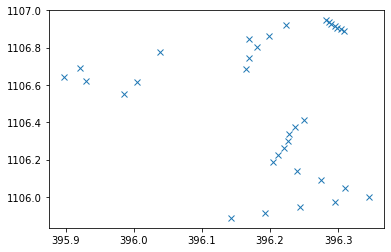

In [128]:
plt.plot(X[1],Y[1],'x')

Text(0.5, 1.0, 'Trajectoire des éléments dans la scene-0061')

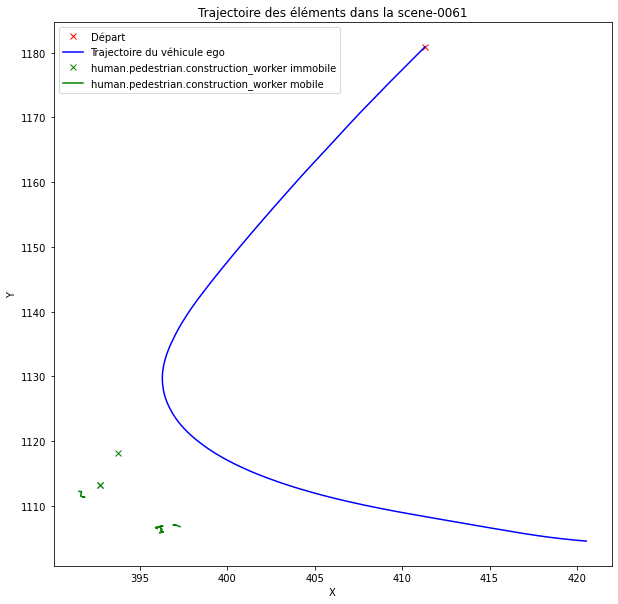

In [129]:
color = ['g','darkorange','firebrick','c','indigo','k','sandybrown','purple','olive','hotpink','grey','rosybrown','chartreuse','magenta','gold','lavender','aqua','darkkhaki','lightgrey','pink','palegreen','navy','violet']
fig = plt.figure(1, figsize=(10, 10))
plt.plot(X1,Y1,'x',label='Départ',color='r')
plt.plot(X_coord,Y_coord,label ='Trajectoire du véhicule ego',color='b')

Immo, Mobile = immobile(X,Y)
if len(Immo)>0 :
    plt.plot(X[Immo[0]][0],Y[Immo[0]][0],'x',label=catego_name +' immobile',color=color[0])
if len(Mobile)>0: 
    plt.plot(X[Mobile[0]],Y[Mobile[0]],label=catego_name +' mobile',color=color[0])
for i in range(0,len(X)):
    if i in Immo :
        plt.plot(X[i][0],Y[i][0],'x',color=color[0])
    else : 
        plt.plot(X[i],Y[i],color=color[0])
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectoire des éléments dans la '+scene_name)

### Étape 7 : Automatisation du tracé de toutes les catégorie pour une scène donnée

In [130]:
def traj_ego_environment(scene_name):
    
    scene_token = nusc.field2token('scene','name',scene_name)[0]
    sample_token = nusc.field2token('sample','scene_token',scene_token)# Ensemble des token des échantillons de la scene 
    
    # Pour tracer la trajectoire du véhicule ego
    Liste_ego_poses = get_poses(scene_token) 
    X_coord =[]
    Y_coord =[]
    Z_coord =[]
    for k in range(0,len(Liste_ego_poses)):
        X_coord.append(Liste_ego_poses[k]['translation'][0])
        Y_coord.append(Liste_ego_poses[k]['translation'][1])
        Z_coord.append(Liste_ego_poses[k]['translation'][2])
    # Lieu de départ du véhicule ego
    X1 = X_coord[0]
    Y1 = Y_coord[0]
    
    # Ensemble des sample_annotation de la scène :
    sample_annotation_token = []
    for k in sample_token : 
        L = nusc.field2token('sample_annotation','sample_token',k)
        sample_annotation_token = sample_annotation_token + L
    
    # On créé la liste des token des instances présents dans les sample_annotation
    L_instance_token = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_instance_token.append(exemple['instance_token'])
    # Puisque pour un même objet, on peut avoir plusieurs annotations, on supprime les doublons de L
    L_instance_token = list(set(L_instance_token))
    
    # Liste des catégories d'objet dans la scène 
    L_category_name = []
    for k in sample_annotation_token :
        exemple = nusc.get('sample_annotation', k)
        L_category_name.append(exemple['category_name'])
    L_category_name = list(set(L_category_name)) #on supprime les doublons 
   
    # On crée une liste de 23 couleurs car il y a au maximum 23 catégories dans une scène 
    c = ['g','darkorange','firebrick','c','indigo','k','sandybrown','purple','olive','hotpink','grey','rosybrown','chartreuse','magenta','gold','lavender','aqua','darkkhaki','lightgrey','pink','palegreen','navy','violet']
    
    # Boucle sur chaque catégorie trouvée
    for j in range(0,len(L_category_name)):   
        couleur_catego = c[j]
        catego_name = L_category_name[j]
        catego_token = nusc.field2token('category','name',catego_name)
        category = nusc.get('category',catego_token[0])

        # Ensemble des instances appartenant à la fois à la scène et à la catégorie
        L_instance_category = nusc.field2token('instance','category_token',catego_token[0]) # instance dans la catégorie
        L_instance_category = [x for x in L_instance_category if x in L_instance_token]# et dans la scène 
        L_instance_category
        
        # Il peut y avoir plusieurs éléments de la catégorie dans la scène, ici chaque ligne de L représente 
        # les token des sample_annotation pour un élément de cette catégorie. 

        L=[]
        for k in L_instance_category : 
            instance_category = nusc.get('instance',k)
            nbr_annotations = instance_category['nbr_annotations']
            if nbr_annotations == 1:
                L.append([instance_category['first_annotation_token']])
            else : 
                H = []
                first_token = instance_category['first_annotation_token']
                last_token = instance_category['last_annotation_token']
                current_token = first_token 
        
                s = 0 
                while s!= nbr_annotations :
                    current_ann = nusc.get('sample_annotation', current_token)
                    H.append(current_ann['token'])
                    current_token = current_ann['next'] #On passe au suivant
                    s+=1
                L.append(H)
        
        # Maintenant qu'on a les token de tous les sample_annotation pour tous les éléments d'une même catégorie, 
        # on va pouvoir récupérer leurs positions et tracer leurs trajectoires

        X = []
        Y = []
        Z = []
        for k in L :
            x = []
            y = []
            z = []
            for j in k :
                sample_annotation = nusc.get('sample_annotation',j)
                x.append(sample_annotation['translation'][0])
                y.append(sample_annotation['translation'][1])
                z.append(sample_annotation['translation'][2])
            X.append(x)
            Y.append(y)
            Z.append(z)
        
        fig = plt.figure(1, figsize=(10, 10))
        
        # On crée les listes des objets immobiles et mobiles de la catégorie
        Immo, Mobile = immobile(X,Y)
        if len(Immo)>0 :
            plt.plot(X[Immo[0]][0],Y[Immo[0]][0],'x',label=catego_name +' immobile',color=couleur_catego)
        if len(Mobile)>0 :
            plt.plot(X[Mobile[0]],Y[Mobile[0]],label=catego_name +' mobile',color=couleur_catego)
        for i in range(0,len(X)):
            if i in Immo :
                plt.plot(X[i][0],Y[i][0],'x',color=couleur_catego)
            else : 
                plt.plot(X[i],Y[i],color=couleur_catego)
        
    plt.plot(X1,Y1,'x',label='Départ',color='r')
    plt.plot(X_coord,Y_coord,label ='Trajectoire véhicule ego',color='cornflowerblue')
    plt.legend(bbox_to_anchor=(1.5, 1.0),loc='best')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Trajectoire des éléments dans la '+ scene_name)
    plt.show()


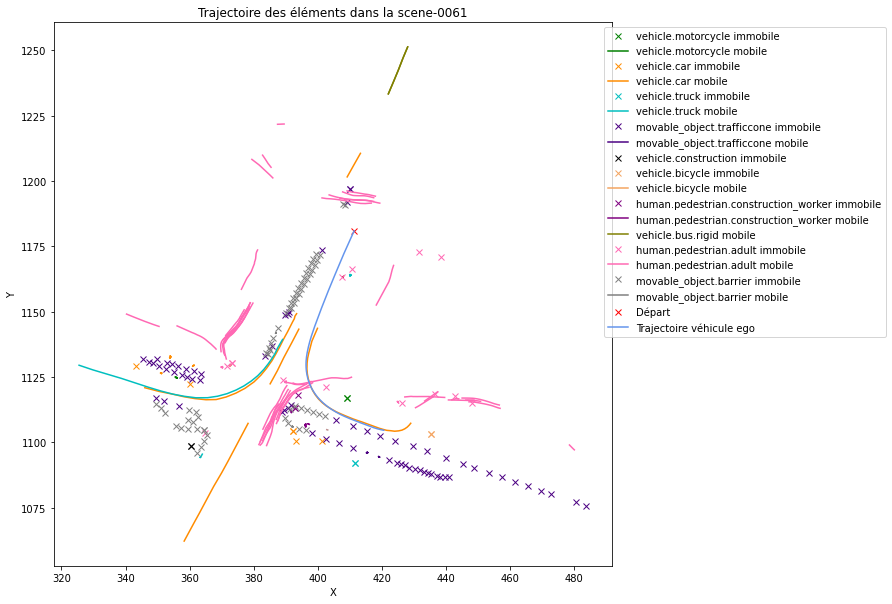

In [131]:
traj_ego_environment(scene_name)

# Problème : une fois que ça fonctionnera, on sait pas par exemple, si le piéton a traversé avant ou après
# le passage du véhicule, en tout cas on le sait pas sur la carte. 


### Étape 8 : Test sur plusieurs scènes

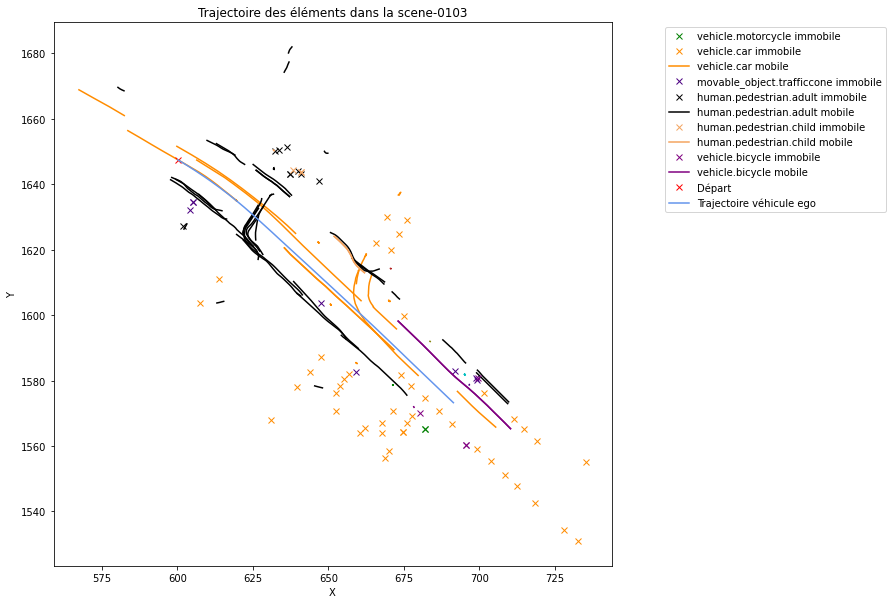

In [132]:
# scene-0103
scene_name = 'scene-0103'
traj_ego_environment(scene_name)

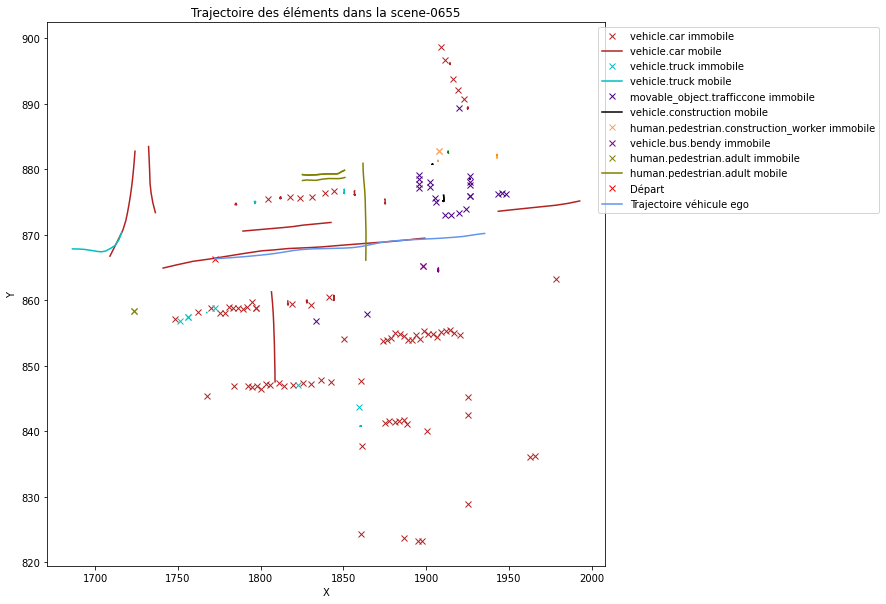

In [133]:
# scene-0655
scene_name = 'scene-0655'
traj_ego_environment(scene_name)

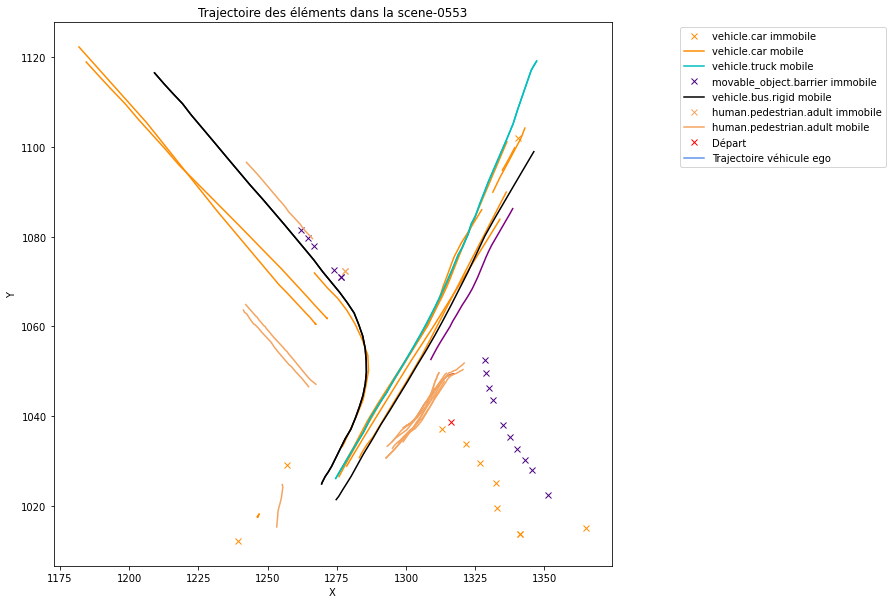

In [135]:
# scene-0553
scene_name = 'scene-0553'
traj_ego_environment(scene_name)

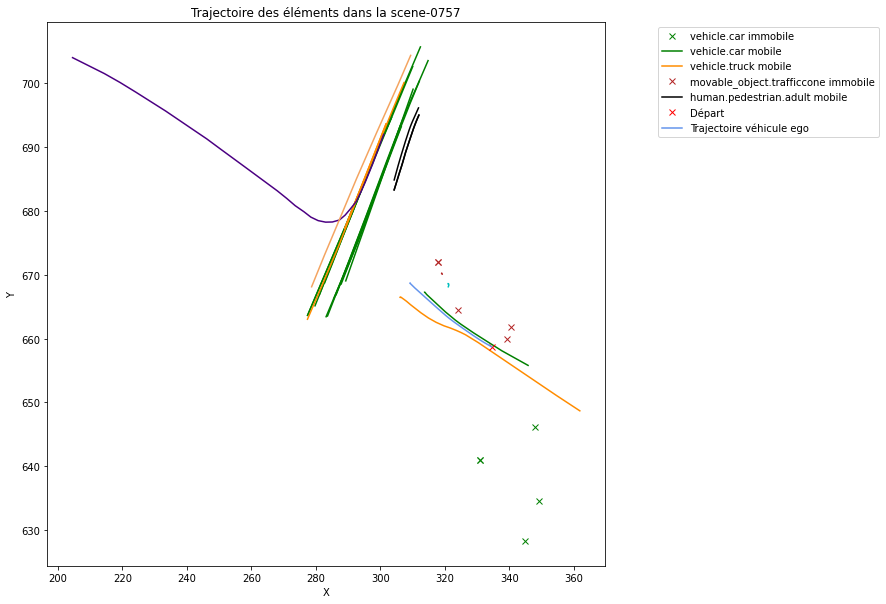

In [136]:
# scene-0757
scene_name = 'scene-0757'
traj_ego_environment(scene_name)

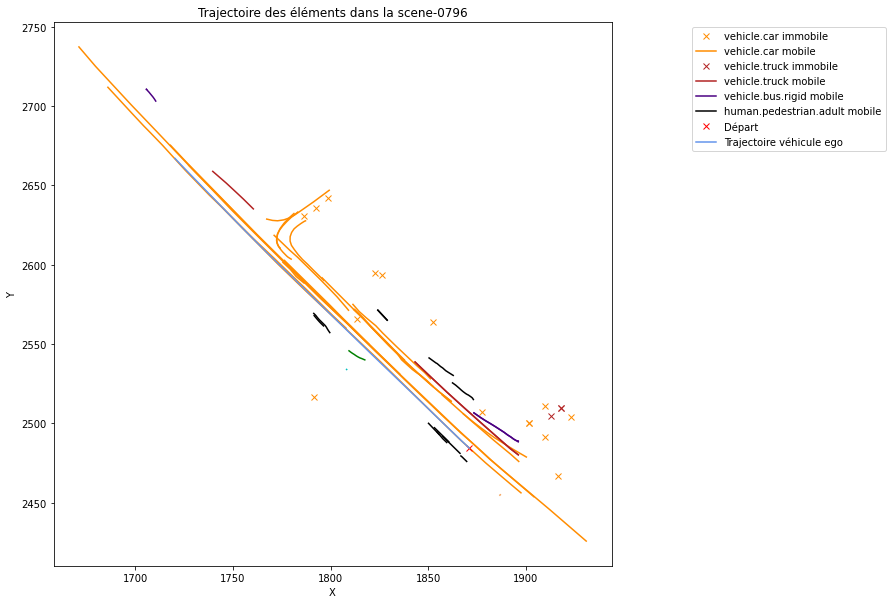

In [137]:
# scene-0796
scene_name = 'scene-0796'
traj_ego_environment(scene_name)

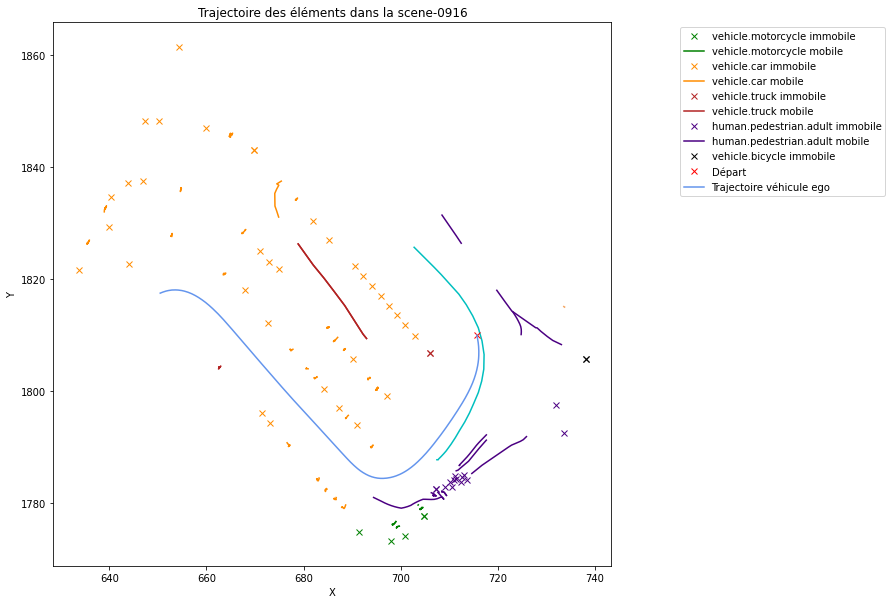

In [138]:
# scene-0916
scene_name = 'scene-0916'
traj_ego_environment(scene_name)

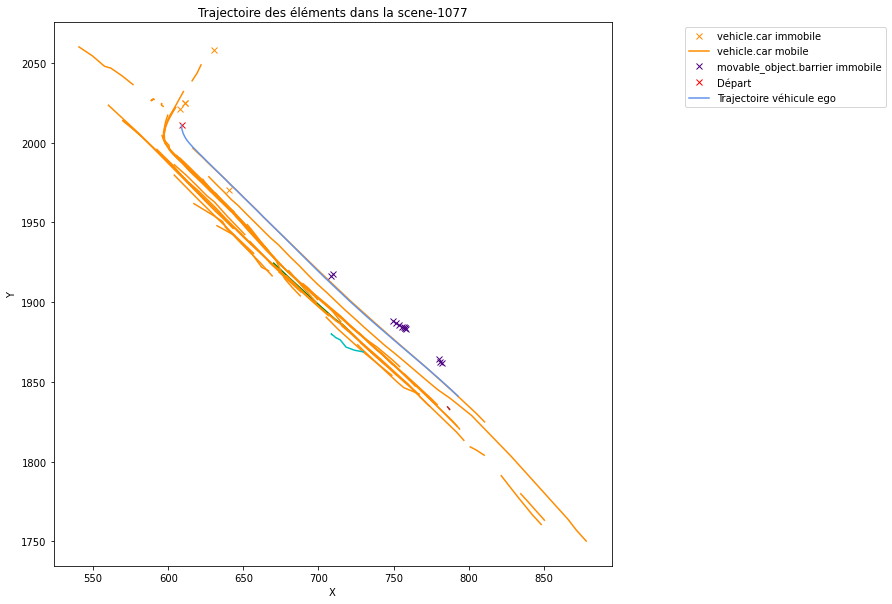

In [139]:
# scene-1077
scene_name = 'scene-1077'
traj_ego_environment(scene_name)

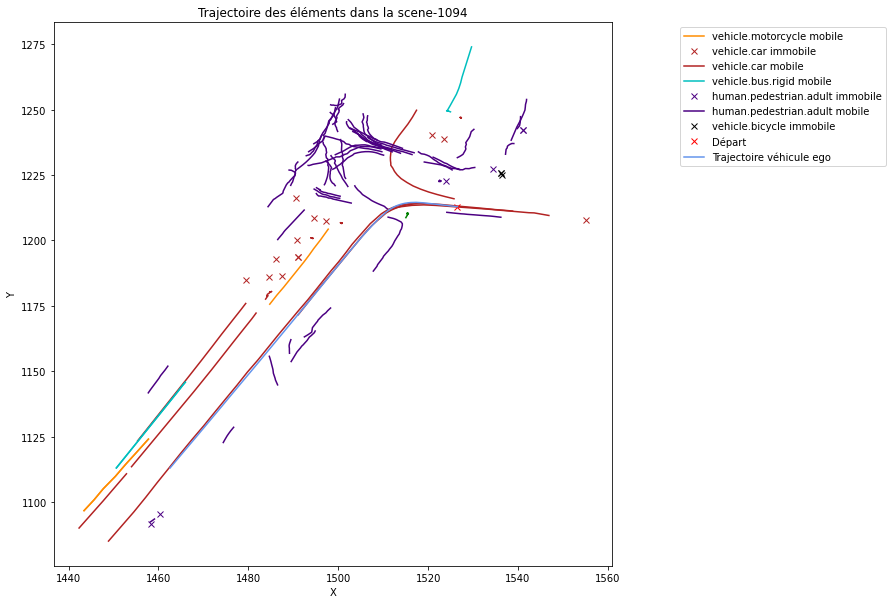

In [140]:
# scene-1094
scene_name = 'scene-1094'
traj_ego_environment(scene_name)

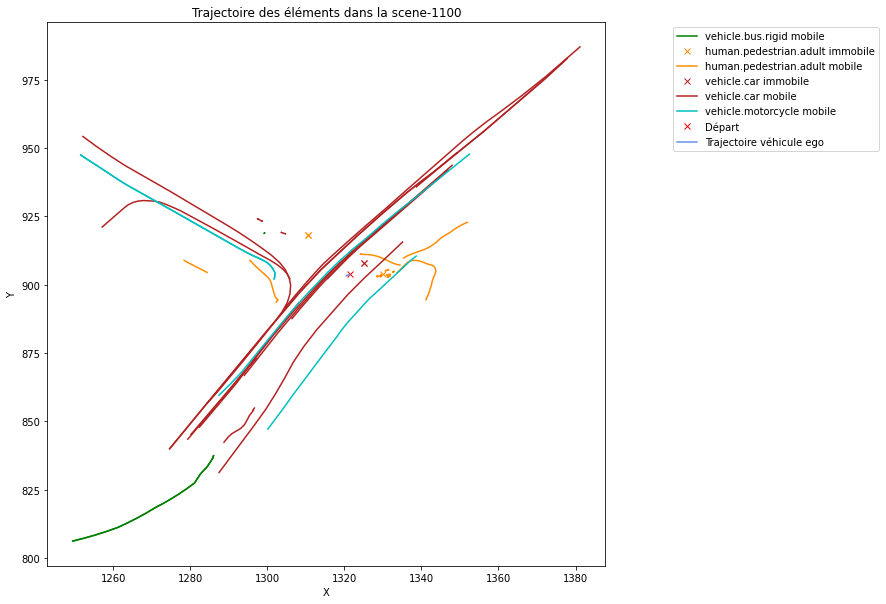

In [141]:
# scene-1100
scene_name = 'scene-1100'
traj_ego_environment(scene_name)